# Bienvenido a tu primer competencia de ciencia de datos!!!

En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Buscamos predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta tragedia ocurrida en el siglo 20.

En este caso, tenemos dos tablas de datos: train y summit (test.csv). Ahora, esta data ha sido sacada de una **competencia de Kaggle** Por eso, la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado**. El mismo Kaggle se encargará de saber si es un buen modelo o no. Posteriormente, esta tabla nombrada **train nos servirá tanto para entrenar como para testear nuestrso modelos**.
El link de la competencia es: https://www.kaggle.com/c/titanic

In [151]:
"CELDA N°01"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random #Una librería para manejar números aleatorios
import missingno as ms #Librería muy útil para ver los valores nulos

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

In [152]:
"CELDA N°02"
train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train.csv')
summit = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/test.csv')

In [153]:
"CELDA N°03"
train.head()

,IdPasajero,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
"CELDA N°04"
#Apliquemos los conceptos aprendidos de la clase pasada: tail, describe

'CELDA N°04'

In [155]:
"CELDA N°05"
#Ahora usemos isna y sum para descubrir cuántos datos perdidos hay en la variable Edad
train['Edad'].isna().sum()

177

Ahora que conocemos la utilidad de ambos métodos **isna y sum** procedemos a aplicarlos en todas las columnas de ambos dataset

In [156]:
"CELDA N°06"
#El método .columns muestra el nombre de todas las columnas del dataset
train.columns

Index(['IdPasajero', 'Sobrevivio', 'Pclass', 'Name', 'Genero', 'Edad',
       'Hermanos', 'Padres_hijos', 'Ticket', 'Tarifa', 'Cabin', 'P_embarque'],
      dtype='object')

In [157]:
"CELDA N°07"
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in train.columns:
  print('En la columna',col,'hay',train[col].isna().sum(),'valores nulos')

En la columna IdPasajero hay 0 valores nulos
En la columna Sobrevivio hay 0 valores nulos
En la columna Pclass hay 0 valores nulos
En la columna Name hay 0 valores nulos
En la columna Genero hay 0 valores nulos
En la columna Edad hay 177 valores nulos
En la columna Hermanos hay 0 valores nulos
En la columna Padres_hijos hay 0 valores nulos
En la columna Ticket hay 0 valores nulos
En la columna Tarifa hay 0 valores nulos
En la columna Cabin hay 687 valores nulos
En la columna P_embarque hay 2 valores nulos


In [158]:
"CELDA N°08"
#A través del método .value_counts() -no olvidar los paréntesis- obtenemos los valores diferentes de la columna Sobrevivio y el número de veces que se repiten
train['Sobrevivio'].value_counts()

0    549
1    342
Name: Sobrevivio, dtype: int64

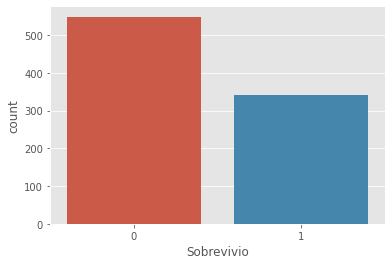

In [159]:
"CELDA N°09"
#Podemos obtener el mismo resultado de forma gráfica a través del método countplot
sns.countplot(train['Sobrevivio'])

**Explicaremos las variables que están dentro de la data**

**Pclass**: Status socioeconómico 1st = ClaseAlta 2nd=ClaseMedia 3rd=ClaseBaja 

**Hermanos**: El dataset define relaciones familiares, es decir, nos dice el número de hermanos.

**Padres_hijos**: Número de padres / hijos dentro del Titanic

**Esposo_esposa** = marido / Mujer (se obvia novias o enamoradas)

**Tarifa**: El costo del ticket que se compró para el pasaje

**Sobrevivio**: Si la persona sobrevivió o no.	0 = No, 1 = Sí

**Ticket**: La clase de ticket que sacó el pasajero.

**P_embarque**: Puerta de embarcación,	C = Cherbourg, Q = Queenstown, S = Southampton

**Cabin**: El número de cabina

**Eliminaremos** los valores que nos parecen **irrelevantes** para predecir si una persona sobrevive o no dentro del Titanic. En este caso, intuimos que son:

- Nombre: ¿Qué tiene que ver el nombre con que se sobreviva o no?


- Ticket: Si bien se podría pensar que el ticket nos daría algún criterio, en este caso no se ha encontrado una relación directa.


- PassengerId: Lo mismo que la variable Ticket. Asumimos que no tiene relación con la supervivencia y lo quitamos.

In [160]:
"CELDA N°10"
#Con el método .drop se elimina lo que está detallado dentro de los paréntesis -si es una columna debes poner axis=1, si es una fila axis=0
train.drop(['Name','Ticket','IdPasajero','Cabin'], axis = 1,inplace=True) #con el parámetro inplace=True se actualiza o sobreescribe el dataset train
summit = summit.drop(['Name','Ticket','IdPasajero','Cabin'], axis = 1)

## Missingno: Una forma más interactiva de ver mis nulos.

Esta librería nos grafica nuestro dataframe de tal manera en la que vemos qué columnas tienen datos vacíos. Esto es representado por los espacios en blanco que tenemos. **Se recomienda su uso cuando el dataset no cuenta con muchas columnas**

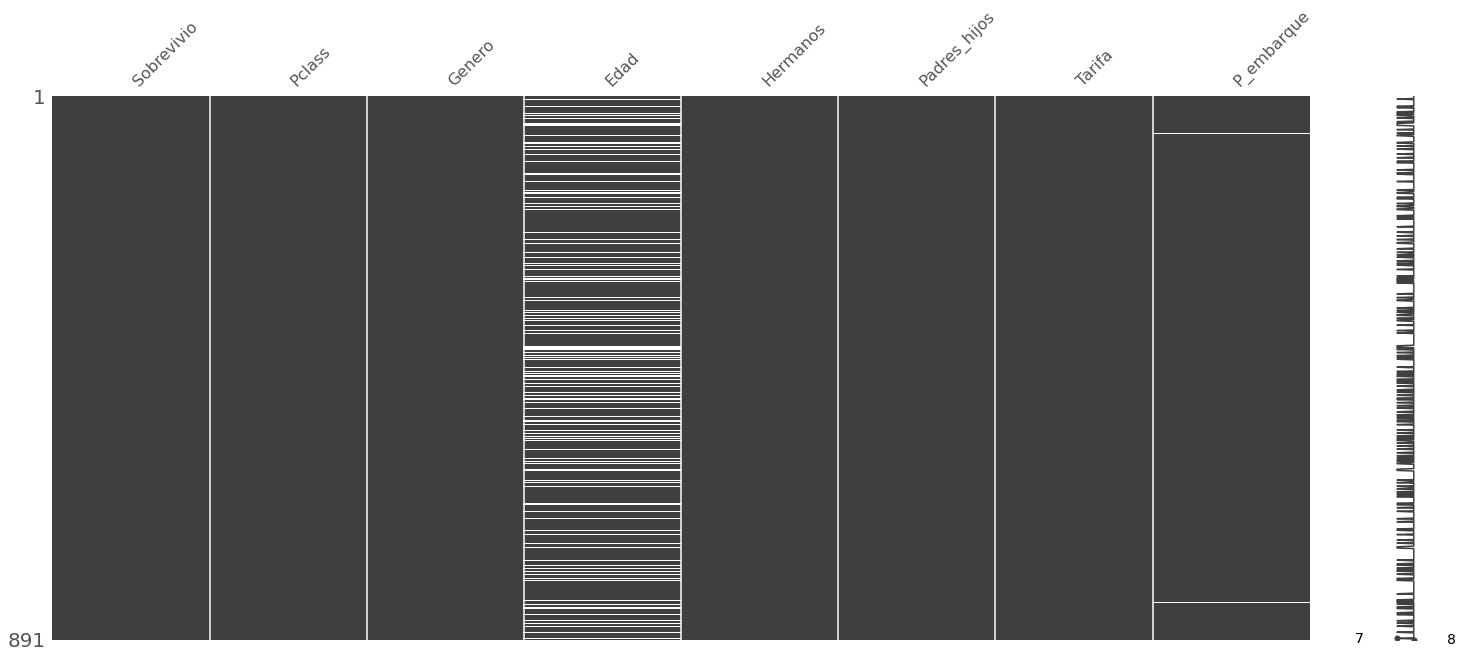

In [161]:
"CELDA N°11"
#A través del método .matrix de la librería missingno -renombrada como ms- obtenemos la gráfica de los nulos
ms.matrix(train)

#### Explicaremos brevemente cómo filtrar datos dentro de un dataframe (mask method) 

Para utilizar las **máscaras de filtro** contamos con dos métodos que ingresar justo después del dataset (ej: train.loc, summit.iloc):

- loc: Debes declarar dos parámetros en el siguiente orden: **(filas, columnas)**
- iloc: **Es necesario indicar los índices de las filas y columnas** (número entero)

Para mayor detalle puedes consultar [este artículo del blog de Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/)

In [ ]:
#¿Cómo filtrar datos?

In [ ]:
#Cómo agarrar una columna de mis datos?

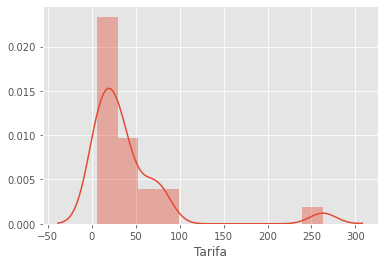

In [162]:
"CELDA N°12"
#Con el método .distplot realizamos un gráfico de barras y con el método .loc filtramos la columna Edad y mostramos los valores de la columna Tarifa
sns.distplot(train.loc[train['Edad']>60,'Tarifa'])

In [163]:
"CELDA N°13"
#Con el método .iloc filtramos las filas por índice desde la número 400 al número 459 del dataset train
train.iloc[400:450]

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque
400,1,3,male,39.0,0,0,7.9250,S
401,0,3,male,26.0,0,0,8.0500,S
402,0,3,female,21.0,1,0,9.8250,S
403,0,3,male,28.0,1,0,15.8500,S
404,0,3,female,20.0,0,0,8.6625,S
405,0,2,male,34.0,1,0,21.0000,S
406,0,3,male,51.0,0,0,7.7500,S
407,1,2,male,3.0,1,1,18.7500,S
408,0,3,male,21.0,0,0,7.7750,S
409,0,3,female,NaN,3,1,25.4667,S


## Procesamiento de Nulos: 

Un valor Nulo no es más que data que no ha sido recogida (o imputada), osea **data vacía**. Esta nulidad puede deberse a diferentes casos y las maneras en las que podemos lidiar con ellos son varias. La forma en cómo podemos tratar con este tipo de variable depende de diferentes factores como la cantidad, la dispersión y la importancia de la variable para el target (recuerda que target es la variable que vamos a predecir). 



In [164]:
"CELDA N°14"
#Con los métodos .mean() y .std() podemos mostrar el promedio y la desviación estándar de la columna Edad
print("La edad media de nuestro train dataset es:",train['Edad'].mean(),"\nLa desviación estandar de la edad de nuestro train dataset es:",train['Edad'].std())
print("La edad media de nuestro summitdataset es:",summit['Edad'].mean(),"\nLa desviación estándar de la edad de nuestro summites:",summit['Edad'].std())

La edad media de nuestro train dataset es: 29.69911764705882 
La desviación estandar de la edad de nuestro train dataset es: 14.526497332334044
La edad media de nuestro summitdataset es: 30.272590361445783 
La desviación estándar de la edad de nuestro summites: 14.18120923562442


In [165]:
"CELDA N°15"
#Con el método .quantile(.90) podemos definir el percentil 90 de la columna Edad
train['Edad'].quantile(.90)

50.0

In [166]:
"CELDA N°16"
#Con el método .mode() -no olvidar escribir [0] porque modas pueden ser varias.- obtenemos la moda o el valor más frecuente de la columna P_embarque 
train['P_embarque'].mode()[0]

'S'

Vamos a definir una **función** para llenar automáticamente los vacíos:
. Un conjunto lógico de código que se une para hacerlo generalizado.
. Tiene parámetros necesarios al llamarlo y a su vez parámetros por default

### Reemplazando nulos

In [167]:
"CELDA N°17"
#Crearemos una función para llenar de manera random dentro del intervalo de la media y desviación estándar
def llena_nan_con_media_y_std(df,col='Edad'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Edad' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(int(min_),int(max_)) #randomizo dentro de los intervalos que quiero y especifico que quiero enteros
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [168]:
"CELDA N°18"
#Aplicamos la función para reemplazar los nulos de la columna Edad de los dataset train y summit
llena_nan_con_media_y_std(train) #Aplico la función para train
llena_nan_con_media_y_std(summit) #Aplico la función para summit

Ahora tenemos que hacernos cargo de los valores nulos de la columna P_embarque y Tarifa dentro de los dos dataframes (summit y train)

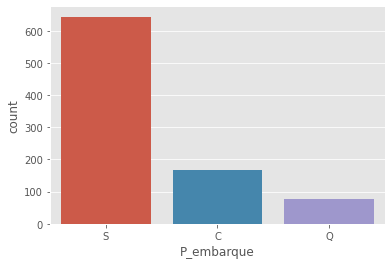

In [169]:
"CELDA N°19"
#Realizamos una gráfica de barras a través del método countplot de la columna P_embarque
sns.countplot(train['P_embarque'])

In [170]:
"CELDA N°20"
#Con el método .fillna reemplazamos los vacíos de la columna P_embarque con la moda por ser el puerto de embarque más repetido 
train['P_embarque'].fillna(train['P_embarque'].mode()[0], inplace=True)
summit['P_embarque'].fillna(train['P_embarque'].mode()[0], inplace=True)

In [171]:
"CELDA N°21"
#Volvemos a aplicar .fillna sobre la columna Tarifa del dataset summit
summit['Tarifa'].fillna(summit['Tarifa'].mean(),inplace=True)

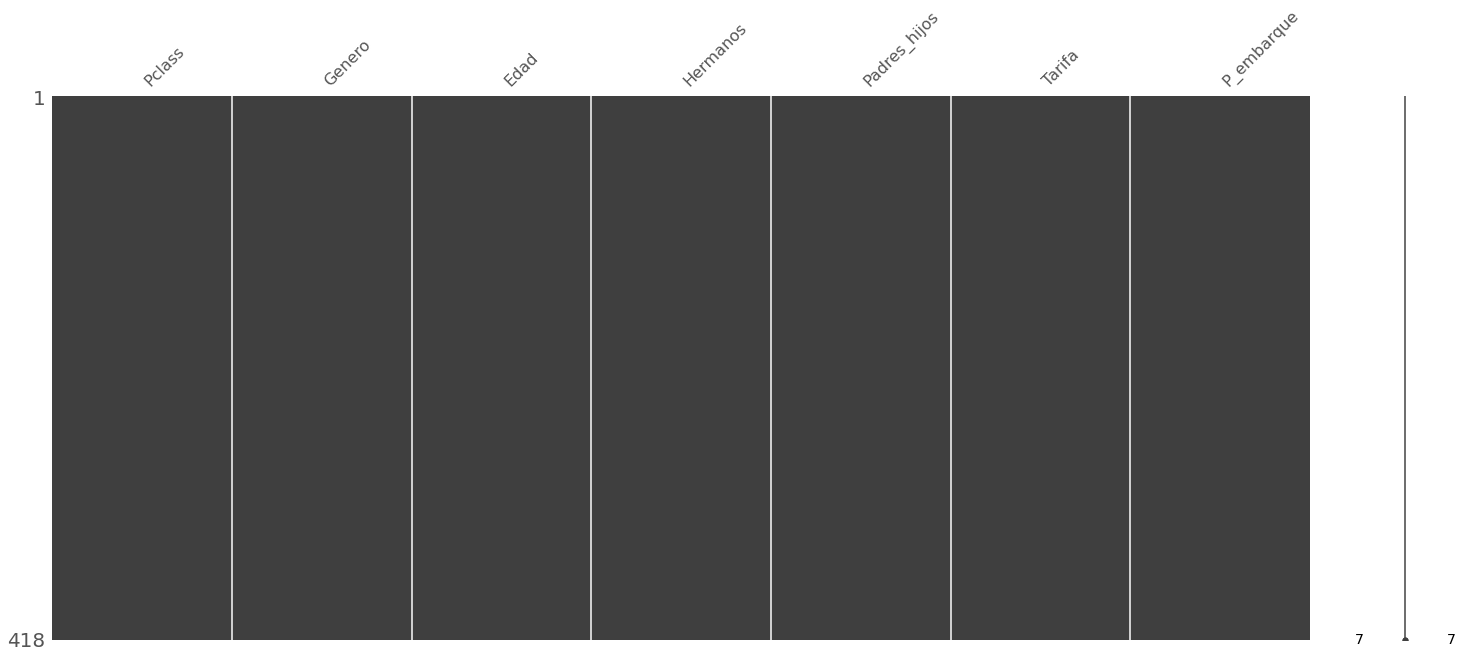

In [172]:
"CELDA N°22"
#Volvemos a aplicar el método .matrix para comprobar que no haya vacíos
ms.matrix(summit)

##Detectando y procesando outliers

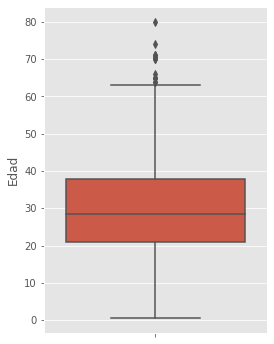

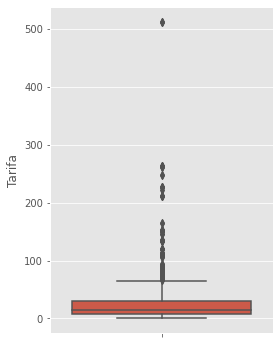

In [173]:
"CELDA N°23"
#Aplicamos el método boxplot de la librería seaborn -que denominamos sns
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
plt.figure(figsize=(4,6))
sns.boxplot(train['Edad'], orient="v")
plt.show()
plt.figure(figsize=(4,6))
sns.boxplot(train['Tarifa'], orient='v')
plt.show()

Viendo el boxplot, con la variable Edad habrá problema.
Reemplazaremos los outliers de Tarifa por encima del percentil 95%:

In [174]:
"CELDA N°24"
#Aplicamos .index para obtener las filas superiores del percentil 95 y .loc para reemplazar los outliers por el percentil 95
outliers_train_tarifa = train[train['Tarifa'] > train['Tarifa'].quantile(.95)].index
train.loc[outliers_train_tarifa,'Tarifa'] = train['Tarifa'].quantile(.95)

In [175]:
"CELDA N°25"
#Repetimos el procedimiento para el dataset summit
outliers_train_summit = summit[summit['Tarifa']> summit['Tarifa'].quantile(.95)].index
summit.loc[outliers_train_summit,'Tarifa'] = summit['Tarifa'].quantile(.95)

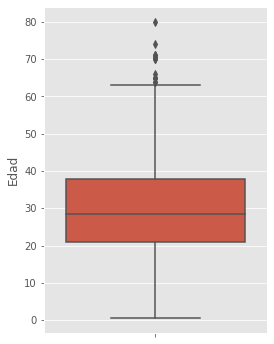

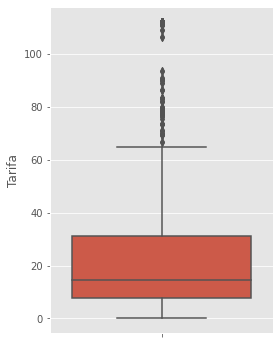

In [176]:
"CELDA N°26"
#Repetimos el boxplot para comprobar los cambios realizados
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
plt.figure(figsize=(4,6))
sns.boxplot(train['Edad'], orient="v")
plt.show()
plt.figure(figsize=(4,6))
sns.boxplot(train['Tarifa'], orient='v')
plt.show()

## **Feature Engineering:** Podemos (y debemos) crear otros features a la data



Hemos visto que hay dos variables que se relacionan a la familia del pasajero (Hermanos & Padres_hijos), por ello creamos una variable que resuma la cantidad de familiares y si la persona viaja sola o acompañada en la nave.

In [177]:
"CELDA N°27"
#Creamos una columna nueva para contar el total entre las columnas Hermanos y Padres_Hijos
train['Miembros_de_fam'] = train['Hermanos'] + train['Padres_hijos'] + 1 #(1 reempresenta a él o ella)
summit['Miembros_de_fam'] = summit['Hermanos'] + summit['Padres_hijos'] + 1

In [178]:
"CELDA N°28"
#Creamos una columna nueva para distinguir los pasajeros que viajan solos
train['Viaja_solo'] = 1 
train['Viaja_solo'].loc[train['Miembros_de_fam'] > 1] = 0
summit['Viaja_solo'] = 1 
summit['Viaja_solo'].loc[summit['Miembros_de_fam'] > 1] = 0

In [179]:
"CELDA N°29"
#Comprobamos las columnas creadas
train.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1


#### Dándole sentido a nuestra variable... 

**Pensando el problema**: ¿Qué es lo que pasa en un desastre como este? No le dan prioridad a las mujeres y niños para que puedan ir directo a las naves de rescate? Entonces, sería conveniente identificar si el pasajero es Hombre, Mujer o **niño** Para esto, crearemos la variable niño. 

In [180]:
"CELDA N°30"
#Añadimos la categoría niño en la columna Genero para todas las filas cuyo valor en la columna Edad sea menor o igual a 15
train.loc[train['Edad']<=15,'Genero'] = 'niño'
summit.loc[(summit['Edad']<=15),'Genero'] = 'niño'

#### Analizando la relación de las nuevas variables vs el target

**Comparando el target con el Género**: ¿Influye el Género del pasajero con el valor de la columna Sobrevivio?

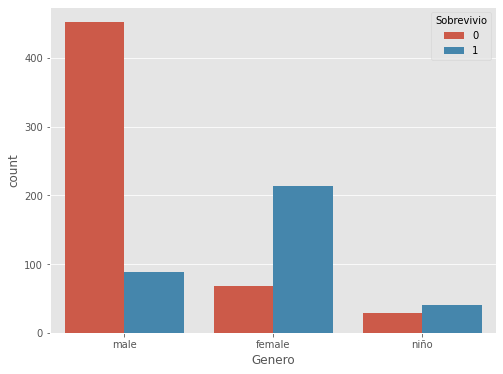

In [181]:
"CELDA N°31"
#Utilizamos .countplot para realizar una gráfica de barras de la columna Genero distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'Genero', data = train, hue="Sobrevivio")

**Comparando el target con el Puerto de embarque**: ¿Influye el Puerto de embarque del pasajero con el valor de la columna Sobrevivio?

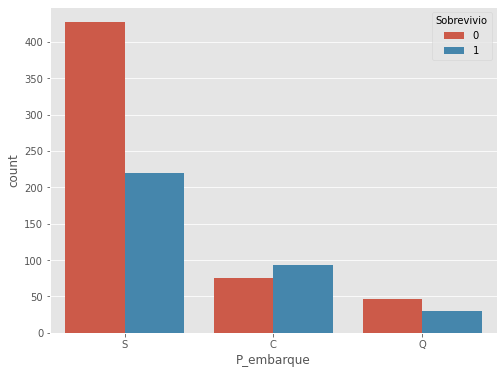

In [182]:
"CELDA N°32"
#Utilizamos .countplot para realizar una gráfica de barras de la columna P_embarque distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'P_embarque', data = train, hue="Sobrevivio")

In [183]:
"CELDA N°33"
#Ahora podemos decir qué prioridades de categorías hay dentro de las variables P_embarque y Genero
cat_to_nums = {"P_embarque":  {"S": 1, "C": 3, "Q":5},
               "Genero": {"male":1,"niño":3,"female":5}}
train.replace(cat_to_nums, inplace = True)
summit.replace(cat_to_nums, inplace = True)

In [184]:
"CELDA N°34"
#Comprobamos los cambios realizados
train.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,0,3,1,22.0,1,0,7.2500,1,2,0
1,1,1,5,38.0,1,0,71.2833,3,2,0
2,1,3,5,26.0,0,0,7.9250,1,1,1
3,1,1,5,35.0,1,0,53.1000,1,2,0
4,0,3,1,35.0,0,0,8.0500,1,1,1


### Viendo correlaciones entre mis datos

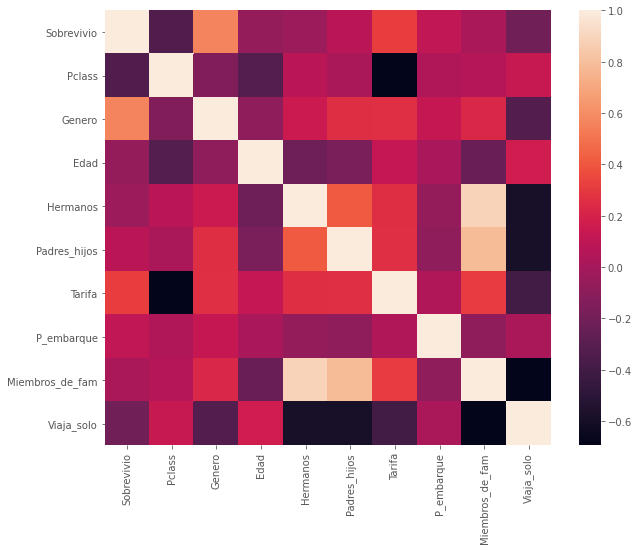

In [185]:
"CELDA N°35"
#Con .corr() -no olvidar los paréntesis- podemos realizar un mapa de calor para identificar si hay correlación entre variables
corr_ = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_)

Según el gráfico las columnas **Miembros_de_fam**, **Hermanos**, **Padres_hijos** están correlacionadas.

Por ello solo nos quedaremos con la columna que nos aporta mayor información: **Miembros_de_fam**

In [186]:
"CELDA N°36"
#Con .drop eliminamos las columnas Hermanos y Padres_hijos
train.drop(['Hermanos','Padres_hijos'],axis=1, inplace=True)
summit.drop(['Hermanos','Padres_hijos'],axis=1,inplace=True)

In [187]:
"CELDA N°37"
#Comprobamos los cambios realizados
train

,Sobrevivio,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,0,3,1,22.000000,7.2500,1,2,0
1,1,1,5,38.000000,71.2833,3,2,0
2,1,3,5,26.000000,7.9250,1,1,1
3,1,1,5,35.000000,53.1000,1,2,0
4,0,3,1,35.000000,8.0500,1,1,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,1,1,1
887,1,1,5,19.000000,30.0000,1,1,1
888,0,3,5,19.823609,23.4500,1,4,0
889,1,1,1,26.000000,30.0000,3,1,1


## Normalizando mi data:
Cuándo normalizar o standarizar?: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

Veamos la distribución de nuestros dos datos netamente numéricos que tenemos: Tarifa y Edad


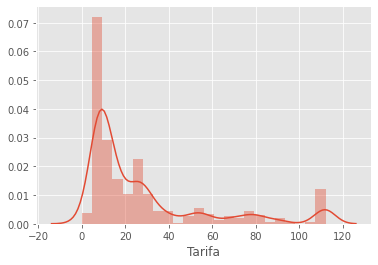

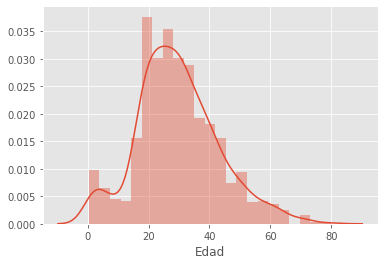

In [188]:
"CELDA N°38"
#Con .distplot mostramos un histograma con una línea de tendencia de ambas variables
sns.distplot(train['Tarifa'])
plt.show()
sns.distplot(train['Edad'])
plt.show()

In [189]:
"CELDA N°39"
#Importamos la librería normalize para la normalización de la data.
from sklearn.preprocessing import normalize

In [190]:
"CELDA N°40"
#Seleccionamos las columnas que vamos a normalizar
X_train_to_norm = [train['Tarifa'],train['Edad']]
X_summit_to_norm = [summit['Tarifa'],summit['Edad']]

In [191]:
"CELDA N°41"
#Aplicamos normalize sobre las columnas seleccionadas
X_train_normalizada = normalize(X_train_to_norm)
X_summit_normalizada = normalize(X_summit_to_norm)

In [192]:
"CELDA N°42"
#Asignamos cada los datos normalizados de cada columna: Tarifa y Edad en cada uno de los dos dataset: train y summit
train = train.assign(Tarifa = X_train_normalizada[0]) 
train = train.assign(Edad = X_train_normalizada[1])

summit= summit.assign(Tarifa = X_summit_normalizada[0])
summit= summit.assign(Edad = X_summit_normalizada[1])

In [193]:
"CELDA N°43"
#Comprobamos los cambios realizados
train.head()

,Sobrevivio,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,0,3,1,0.022668,0.006032,1,2,0
1,1,1,5,0.039153,0.059304,3,2,0
2,1,3,5,0.026789,0.006593,1,1,1
3,1,1,5,0.036062,0.044176,1,2,0
4,0,3,1,0.036062,0.006697,1,1,1


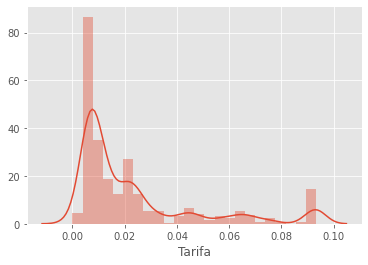

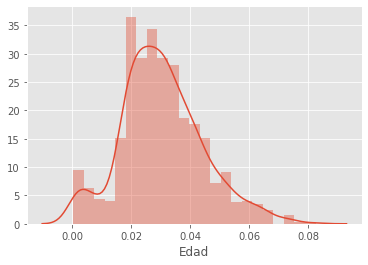

In [197]:
"CELDA N°44"
#Con .distplot mostramos un histograma con la distribución ambas variables
sns.distplot(train['Tarifa'])
plt.show()
sns.distplot(train['Edad'])
plt.show()

##**Partición de la data para entrenamiento**

In [194]:
"CELDA N°45"
#Tendremos que crear nuestras variables predictoras X y nuestra variable objetivo Y
X = train.drop('Sobrevivio',axis=1)
y = train['Sobrevivio']

In [195]:
"CELDA N°46"
#Dividimos nuestros datos para el entrenamiento del modelo importando la lilbrería train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [196]:
"CELDA N°47"
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (757, 7) y para el y_train (757,)
Para el X_test: (134, 7) y para el y_test (134,)
